In [1]:
# imports
# math and data libraries
import random
import pandas as pd

import numpy as np

# visualization
import matplotlib.pyplot as plt
from imageio import imread
import seaborn as sns

from PIL import Image
from PIL import ImageFilter

# deep learning keras imported later
#other 

from pathlib import Path
import os
import glob


In [2]:
# Define path to the data directory
data_dir = Path('Data')

# Path to train directory (Fancy pathlib...no more os.path!!)
train_dir = data_dir / 'train'

# Path to validation directory
val_dir = data_dir / 'val'

# Path to test directory
test_dir = data_dir / 'test'

print(train_dir)

Data\train


In [3]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'



# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')





# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))
    
    
# create a pandas dataframe
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)


train_data.head()

    

,image,label
0,Data\train\PNEUMONIA\person1153_virus_1932.jpeg,1
1,Data\train\NORMAL\moved32891g_NORMAL2-IM-0393-...,0
2,Data\train\NORMAL\moved56821un_IM-0509-0001-00...,0
3,Data\train\NORMAL\moved18521b_IM-0663-0001.jpeg,0
4,Data\train\NORMAL\moved41601r_IM-0315-0001.jpeg,0


1    3875
0    3875
Name: label, dtype: int64


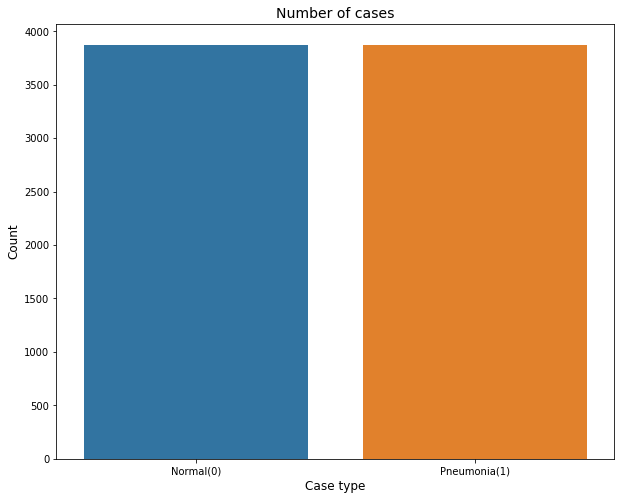

In [4]:
# Check the balance of the dataset
cases_count = train_data['label'].value_counts()
print(cases_count)


plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

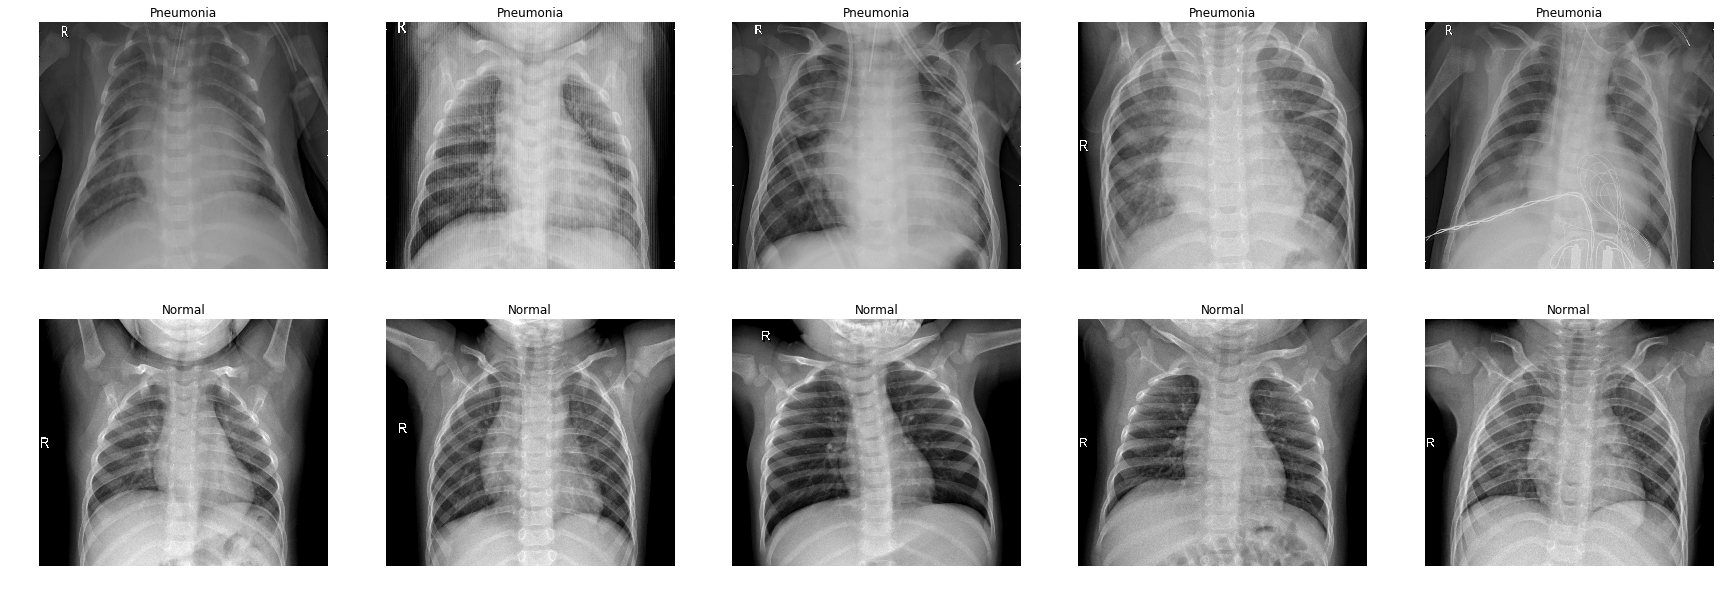

In [5]:
pneumonia_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()


samples = pneumonia_samples + normal_samples
del pneumonia_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Pneumonia")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()
    

In [88]:
from PIL import Image
from PIL import ImageFilter
filelist =  (train_data[train_data['label']==0]['image'].iloc[:]).tolist()
count= 1 

for imagefile in os.listdir(normal_cases_dir):
    
    os.chdir('C:/Users/hknighton/Notebooks/Projects/Deep Learning/Pneumonia/Data/train/NORMAL')
    im=Image.open(imagefile)
    im=im.convert("RGB")
    r,g,b=im.split()
    r=r.convert("RGB")
    g=g.convert("RGB")
    b=b.convert("RGB")
    im_blur=im.filter(ImageFilter.GaussianBlur)
    im_unsharp=im.filter(ImageFilter.UnsharpMask)
    image_file = str(imagefile)
    
    os.chdir('C:/Users/hknighton/Notebooks/Projects/Deep Learning/Pneumonia/Data/Copy')
    r.save(str(count)+'r_'+imagefile)
    g.save(str(count)+'g_'+imagefile)
    b.save(str(count)+'b_'+imagefile)
    im_blur.save(str(count)+'bl_'+imagefile)
    im_unsharp.save(str(count)+'un_'+imagefile)
    
os.chdir('C:/Users/hknighton/Notebooks/Projects/Deep Learning/Pneumonia/')   

In [10]:
os.chdir('C:/Users/hknighton/Notebooks/Projects/Deep Learning/Pneumonia/')

In [89]:
# move a random amount of the generated files to the Normal Directory to balance the dataset


def move_image(from_folder,dest_folder,needed):
    directory = os.getcwd()
    
    path, dirs, files = next(os.walk(from_folder))
    file_count = len(files)
    selected_files = []
    
    for file in range(0,needed):
        x = random.randint(1,file_count)
        while x in selected_files: # prevent repeats
            x = random.randint(1,file_count)
            
        selected_files.append(x)
    counter = 1
    print(len(selected_files))
    moved_files=[]
    for filename in os.listdir(from_folder):
        if counter in selected_files:
            os.chdir(from_folder)
            
            im = Image.open(filename)
            os.chdir(dest_folder)
            im.save(str("moved")+str(counter)+filename)
            moved_files.append(counter)
        counter +=1
    
    os.chdir(directory)# go back to the notebooks folder
    
    return selected_files,moved_files
        
        
    
                             
needed = cases_count[1]-cases_count[0]
a,b= move_image('C:/Users/hknighton/Notebooks/Projects/Deep Learning/Pneumonia/Data/Copy',
           'C:/Users/hknighton/Notebooks/Projects/Deep Learning/Pneumonia/Data/train/Normal',
           needed)



2534


In [19]:
os.getcwd()

'C:\\Users\\hknighton\\Notebooks\\Projects\\Deep Learning\\Pneumonia'

In [90]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = train_dir / 'NORMAL'
pneumonia_cases_dir = train_dir / 'PNEUMONIA'



# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.jpeg')
pneumonia_cases = pneumonia_cases_dir.glob('*.jpeg')





# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in pneumonia_cases:
    train_data.append((img, 1))
    
    
# create a pandas dataframe
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)


train_data.head()

    
           

,image,label
0,Data\train\PNEUMONIA\person1906_bacteria_4803....,1
1,Data\train\PNEUMONIA\person1045_bacteria_2979....,1
2,Data\train\PNEUMONIA\person1812_bacteria_4667....,1
3,Data\train\NORMAL\moved64951un_NORMAL2-IM-1126...,0
4,Data\train\PNEUMONIA\person1177_virus_2000.jpeg,1


1    3875
0    3875
Name: label, dtype: int64


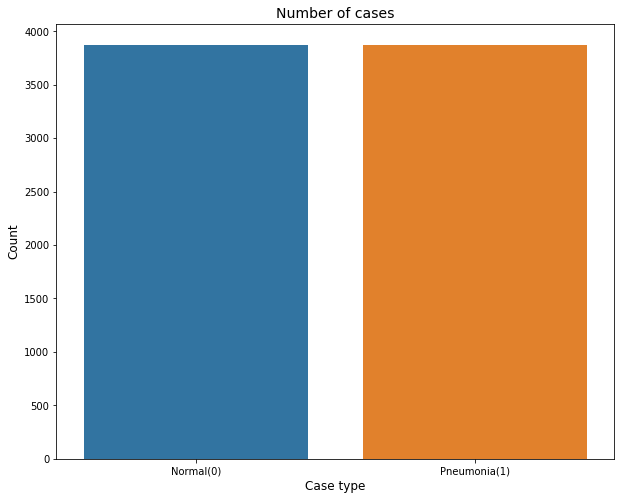

In [91]:
# Check the balance of the dataset
cases_count = train_data['label'].value_counts()
print(cases_count)


plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

## Model Compilation


In [7]:
import keras

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation

from keras.applications import ResNet50

from keras.preprocessing import image

from keras.applications.mobilenet import preprocess_input

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

from keras.models import Model

from keras.optimizers import Adam


from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, InputLayer, Flatten, SeparableConv2D, ZeroPadding2D,GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical

In [35]:
# we will build a model using the first layers from resnet so we can set the weights to the imagenet for better training 
def build_model():
    
    
    #transfer= ResNet50(weights='imagenet',include_top=False,input_shape = (150,150,3))
    
    #i = 1
    
    #for layer in transfer.layers:

   #     layer.trainable = False
    #input_layer = InputLayer((150,150,3))    
    model.add(Sequential())
    model.add(InputLayer((150,150,3)))
    #model.add(transfer)
    
    
    
    
    #model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
    
    #model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    
    model.add(BatchNormalization())
    
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    
    
    
   
    model.add(Dense(64,activation='relu'))
    
    model.add(BatchNormalization())
    
    model.add(Dense(2,activation='softmax'))
    return model
model2 = build_model()

In [8]:

from keras.applications.inception_v3 import InceptionV3
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet',include_top=False,input_shape = (150,150,3))

Instructions for updating:
Colocations handled automatically by placer.
87916544/87910968 [==============================] - 13s 0us/step


In [13]:
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
predictions = Dense(2, activation='sigmoid')(x)

model = Model(base_model.input,predictions)

In [14]:
print("Pretrained layers:")
for i,layer in enumerate(model.layers):
    if layer.trainable == False:
        print(i,layer.name)
        
        
print("\nTrainable layers:")
for i,layer in enumerate(model.layers):
    if layer.trainable:
        print(i,layer.name)

Pretrained layers:
0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalizatio

NameError: name 'model2' is not defined

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [16]:
train_datagen= ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)



train_generator=train_datagen.flow_from_directory('Data/train',

                                                 target_size=(150,150),

                                                 color_mode='rgb',

                                                 batch_size=64,

                                                 class_mode='categorical',

                                                 shuffle=True)


val_datagen=ImageDataGenerator(rescale=1.0/255.0)
val_generator= val_datagen.flow_from_directory('Data/val',

                                                 target_size=(150,150),

                                                 color_mode='rgb',

                                                 batch_size=16,

                                                 class_mode='categorical',

                                                 shuffle=True)

Found 7750 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [45]:
from keras import optimizers

optimizer = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])





In [50]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_val = val_generator.n//val_generator.batch_size
step_size_val


from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint , LearningRateScheduler
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

C:\Users\hknighton\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks.py:1065: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [51]:
history = model.fit_generator(generator=train_generator,

                   steps_per_epoch=step_size_train,

                   epochs=10,
                   validation_data=val_generator,
                   validation_steps = step_size_val, callbacks = [lr_reduce])

Epoch 1/10
121/121 [==============================] - 340s 3s/step - loss: 0.2971 - acc: 0.8794 - val_loss: 2.7244 - val_acc: 0.5625
Epoch 2/10
121/121 [==============================] - 293s 2s/step - loss: 0.2777 - acc: 0.8845 - val_loss: 2.1199 - val_acc: 0.6250
Epoch 3/10
121/121 [==============================] - 277s 2s/step - loss: 0.2705 - acc: 0.8925 - val_loss: 3.1190 - val_acc: 0.5625

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 4/10
121/121 [==============================] - 277s 2s/step - loss: 0.2592 - acc: 0.8946 - val_loss: 2.3272 - val_acc: 0.6250

Epoch 00004: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.
Epoch 5/10
121/121 [==============================] - 281s 2s/step - loss: 0.2516 - acc: 0.9000 - val_loss: 2.0169 - val_acc: 0.6250

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.
Epoch 6/10
121/121 [==============================] - 279s 2s/step - loss: 0.2486 - acc: 0.9

In [21]:
model.save('pneumonia_model2.h5')

In [22]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

[]

In [52]:
test_datagen=ImageDataGenerator(rescale=1.0/255.0)
test_generator= train_datagen.flow_from_directory('Data/test',

                                                 target_size=(150,150),

                                                 color_mode='rgb',

                                                 batch_size=16,

                                                 class_mode='categorical',

                                                 shuffle= False)
test_steps = test_generator.n//test_generator.batch_size

Found 624 images belonging to 2 classes.


In [53]:
model.evaluate_generator(test_generator, steps =test_steps)

[1.8641690438947616, 0.6017628205128205]

In [54]:
# create confusion

pred= model.predict_generator(test_generator, steps =test_steps)
pred=np.argmax(pred,axis=1)
labels = (test_generator.classes)
#labels = dict((v,k) for k,v in labels.items())



In [55]:
from sklearn.metrics import confusion_matrix

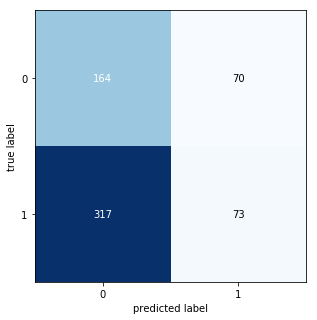

In [56]:
CM = confusion_matrix(labels,pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()